<font color="red" size=5><center>FIFA - EDA and Linear Regression Starter</center></font>

# Introduction

<a class="anchor" id="toc"></a>

FIFA 19 is a football simulation video game developed by EA Vancouver as part of Electronic Arts' FIFA series. It is the 26th installment in the FIFA series, and was released on 28 September 2018 for PlayStation 3, PlayStation 4, Xbox 360, Xbox One, Nintendo Switch, and Microsoft Windows


*Source: [Wikipedia](https://en.wikipedia.org/wiki/FIFA_19)*

This game did not recieve much popular reviews. However, we will have a deep analysis in this notebook.

<font color="red" size=3>Please upvote this kernel if you like it. It motivates me to produce more quality content :)</font>

![Image](https://images.daznservices.com/di/library/GOAL/d2/e5/fifa-19-ultimate-team_19gk2cvl4sd11kpd72z9ufwi1.jpg?t=1305899489&quality=60&w=1600)

# Table of Contents
1. [Glimpse of the data at hand](#1)
2. [Data Cleaning](#2)
3. [Data Analysis](#3)
4. [Exploratory Data Analysis](#4)
5. [Modelling](#5)

----------------------------------------------------------------------------------------------------------------------------------------------
<a id ="1" > </a>
# 1. Glimpse of the data at hand

In [5]:
df=pd.read_csv('/content/data.csv')

In [6]:
df.head().T

0  ...                                               4
Unnamed: 0                                                   0  ...                                               4
ID                                                      158023  ...                                          192985
Name                                                  L. Messi  ...                                    K. De Bruyne
Age                                                         31  ...                                              27
Photo           https://cdn.sofifa.org/players/4/19/158023.png  ...  https://cdn.sofifa.org/players/4/19/192985.png
...                                                        ...  ...                                             ...
GKHandling                                                  11  ...                                              13
GKKicking                                                   15  ...                                               5
GKPositioning                                               14  ...                                              10
GKReflexes                                                   8  ...                                              13
Release Clause                                         €226.5M  ...                                         €196.4M

[89 rows x 5 columns]

In [7]:
df.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8336 entries, 0 to 8335
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                8336 non-null   int64  
 1   ID                        8336 non-null   int64  
 2   Name                      8336 non-null   object 
 3   Age                       8336 non-null   int64  
 4   Photo                     8336 non-null   object 
 5   Nationality               8336 non-null   object 
 6   Flag                      8336 non-null   object 
 7   Overall                   8335 non-null   float64
 8   Potential                 8335 non-null   float64
 9   Club                      8195 non-null   object 
 10  Club Logo                 8335 non-null   object 
 11  Value                     8335 non-null   object 
 12  Wage                      8335 non-null   object 
 13  Special                   8335 non-null   float64
 14  Preferre

In [9]:
df.describe().T

count           mean  ...        75%       max
Unnamed: 0                8336.0    4167.500000  ...    6251.25    8335.0
ID                        8336.0  203315.380278  ...  224255.00  246405.0
Age                       8336.0      26.954655  ...      30.00      45.0
Overall                   8335.0      72.145771  ...      74.00      94.0
Potential                 8335.0      74.820276  ...      78.00      95.0
Special                   8335.0    1738.547690  ...    1894.00    2346.0
International Reputation  8335.0       1.243191  ...       1.00       5.0
Weak Foot                 8335.0       3.061548  ...       3.00       5.0
Skill Moves               8335.0       2.642831  ...       3.00       5.0
Jersey Number             8332.0      16.825852  ...      22.00      99.0
Crossing                  8335.0      55.912657  ...      69.00      93.0
Finishing                 8335.0      51.119016  ...      67.00      95.0
HeadingAccuracy           8335.0      57.328854  ...      70.00      94.0
ShortPassing              8335.0      64.868626  ...      73.00      93.0
Volleys                   8335.0      48.894901  ...      64.00      90.0
Dribbling                 8335.0      61.279304  ...      73.00      97.0
Curve                     8335.0      53.924895  ...      68.00      94.0
FKAccuracy                8335.0      49.020156  ...      64.00      94.0
LongPassing               8335.0      59.039232  ...      69.00      93.0
BallControl               8335.0      64.778884  ...      74.00      96.0
Acceleration              8335.0      66.798560  ...      77.00      97.0
SprintSpeed               8335.0      67.055789  ...      77.00      96.0
Agility                   8335.0      66.617756  ...      77.00      96.0
Reactions                 8335.0      68.465507  ...      72.00      96.0
Balance                   8335.0      65.023035  ...      75.00      96.0
ShotPower                 8335.0      62.187882  ...      74.00      95.0
Jumping                   8335.0      67.710138  ...      75.00      95.0
Stamina                   8335.0      67.914097  ...      77.00      96.0
Strength                  8335.0      68.882424  ...      77.00      95.0
LongShots                 8335.0      54.187882  ...      68.00      94.0
Aggression                8335.0      61.792082  ...      74.00      95.0
Interceptions             8335.0      52.247510  ...      70.00      92.0
Positioning               8335.0      55.938812  ...      70.00      95.0
Vision                    8335.0      59.538572  ...      69.00      94.0
Penalties                 8335.0      53.331494  ...      65.00      92.0
Composure                 8335.0      65.825675  ...      72.00      96.0
Marking                   8335.0      51.829154  ...      69.00      94.0
StandingTackle            8335.0      52.084343  ...      71.00      93.0
SlidingTackle             8335.0      49.471866  ...      69.00      91.0
GKDiving                  8335.0      16.369286  ...      14.00      90.0
GKHandling                8335.0      16.180564  ...      14.00      92.0
GKKicking                 8335.0      15.984163  ...      14.00      91.0
GKPositioning             8335.0      16.266227  ...      14.00      90.0
GKReflexes                8335.0      16.504019  ...      14.00      94.0

[44 rows x 8 columns]

<a id="2"></a> 
# 2. Data Cleaning

In [10]:
df.drop(['Unnamed: 0','Photo','Flag','Club Logo'],axis=1,inplace=True)

In [12]:
msno.bar(df.sample( 18207 ),(28,10),color='red')

NameError: ignored

In [13]:
df.isnull().sum()

ID                  0
Name                0
Age                 0
Nationality         0
Overall             1
                 ... 
GKHandling          1
GKKicking           1
GKPositioning       1
GKReflexes          1
Release Clause    803
Length: 85, dtype: int64

`48` is repeating many times lets check if all of them are same `ID` or not

In [14]:
missing_height = df[df['Height'].isnull()].index.tolist()
missing_weight = df[df['Weight'].isnull()].index.tolist()
if missing_height == missing_weight:
    print('They are same')
else:
    print('They are different')

They are same


As they are same I am assuming it will be same for other all columns too. 

We will see it soon. 

In [15]:
df.drop(df.index[missing_height],inplace =True)

In [16]:
df.isnull().sum()

ID                  0
Name                0
Age                 0
Nationality         0
Overall             0
                 ... 
GKHandling          0
GKKicking           0
GKPositioning       0
GKReflexes          0
Release Clause    802
Length: 85, dtype: int64

As we can see, we guessed right and now we have fewer null values.

In [17]:
df.drop(['Loaned From','Release Clause','Joined'],axis=1,inplace=True)

<a id="3"></a>
# 3. Data Analysis

In [18]:
#Number of countries available and top 5 countries with highest number of players
print('Total number of countries : {0}'.format(df['Nationality'].nunique()))
print(df['Nationality'].value_counts().head(5))
print('--'*40)
print("\nEuropean Countries have most players")

Total number of countries : 139
Spain        685
Brazil       657
Argentina    575
Germany      506
France       492
Name: Nationality, dtype: int64
--------------------------------------------------------------------------------

European Countries have most players


In [20]:
#Total number of clubs present and top 5 clubs with highest number of players
print('Total number of clubs : {0}'.format(df['Club'].nunique()))
print(df['Club'].value_counts().head(5))

Total number of clubs : 611
Vitória Guimarães      29
Eintracht Frankfurt    29
Lazio                  28
Sporting CP            28
FC Barcelona           27
Name: Club, dtype: int64


In [21]:
#Player with maximum Potential and Overall Performance
print('Maximum Potential : '+str(df.loc[df['Potential'].idxmax()][1]))
print('Maximum Overall Perforamnce : '+str(df.loc[df['Overall'].idxmax()][1]))

Maximum Potential : K. Mbappé
Maximum Overall Perforamnce : L. Messi


In [22]:
pr_cols=['Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys',
       'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
       'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']
print('BEST IN DIFFERENT ASPECTS :')
print('_________________________\n\n')
i=0
while i < len(pr_cols):
    print('Best {0} : {1}'.format(pr_cols[i],df.loc[df[pr_cols[i]].idxmax()][1]))
    i += 1

BEST IN DIFFERENT ASPECTS :
_________________________


Best Crossing : K. De Bruyne
Best Finishing : L. Messi
Best HeadingAccuracy : Naldo
Best ShortPassing : L. Modrić
Best Volleys : E. Cavani
Best Dribbling : L. Messi
Best Curve : Quaresma
Best FKAccuracy : L. Messi
Best LongPassing : T. Kroos
Best BallControl : L. Messi
Best Acceleration : Douglas Costa
Best SprintSpeed : K. Mbappé
Best Agility : Neymar Jr
Best Reactions : Cristiano Ronaldo
Best Balance : Bernard
Best ShotPower : Cristiano Ronaldo
Best Jumping : Cristiano Ronaldo
Best Stamina : N. Kanté
Best Strength : Wesley
Best LongShots : L. Messi
Best Aggression : B. Pearson
Best Interceptions : N. Kanté
Best Positioning : Cristiano Ronaldo
Best Vision : L. Messi
Best Penalties : M. Balotelli
Best Composure : L. Messi
Best Marking : A. Barzagli
Best StandingTackle : G. Chiellini
Best SlidingTackle : Sergio Ramos
Best GKDiving : De Gea
Best GKHandling : J. Oblak
Best GKKicking : M. Neuer
Best GKPositioning : G. Buffon
Best GKRe

In [23]:
#Cleaning some of values so that we can interpret them 
def value_to_int(df_value):
    try:
        value = float(df_value[1:-1])
        suffix = df_value[-1:]

        if suffix == 'M':
            value = value * 1000000
        elif suffix == 'K':
            value = value * 1000
    except ValueError:
        value = 0
    return value

df['Value'] = df['Value'].apply(value_to_int)
df['Wage'] = df['Wage'].apply(value_to_int)

In [24]:
df.head().T

0                  1          2       3             4
ID                158023              20801     190871  193080        192985
Name            L. Messi  Cristiano Ronaldo  Neymar Jr  De Gea  K. De Bruyne
Age                   31                 33         26      27            27
Nationality    Argentina           Portugal     Brazil   Spain       Belgium
Overall               94                 94         92      91            91
...                  ...                ...        ...     ...           ...
GKDiving               6                  7          9      90            15
GKHandling            11                 11          9      85            13
GKKicking             15                 15         15      87             5
GKPositioning         14                 14         15      88            10
GKReflexes             8                 11         11      94            13

[82 rows x 5 columns]

In [25]:
#Top earners
print('Most valued player : '+str(df.loc[df['Value'].idxmax()][1]))
print('Highest earner : '+str(df.loc[df['Wage'].idxmax()][1]))
print("--"*40)
print("\nTop Earners")

Most valued player : Neymar Jr
Highest earner : L. Messi
--------------------------------------------------------------------------------

Top Earners


<a id="4"></a> <br>
# 4. Exploratory Data Analysis

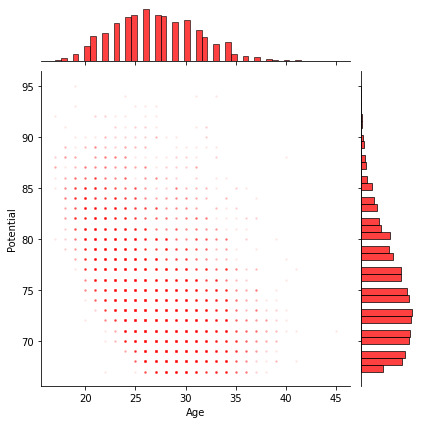

In [26]:
sns.jointplot(x=df['Age'],y=df['Potential'],
              joint_kws={'alpha':0.1,'s':5,'color':'red'},
              marginal_kws={'color':'red'})



`Potential` tends to fall as you grow old

Source of below visualisations: [fifa19-analysis](https://www.kaggle.com/dczerniawko/fifa19-analysis)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


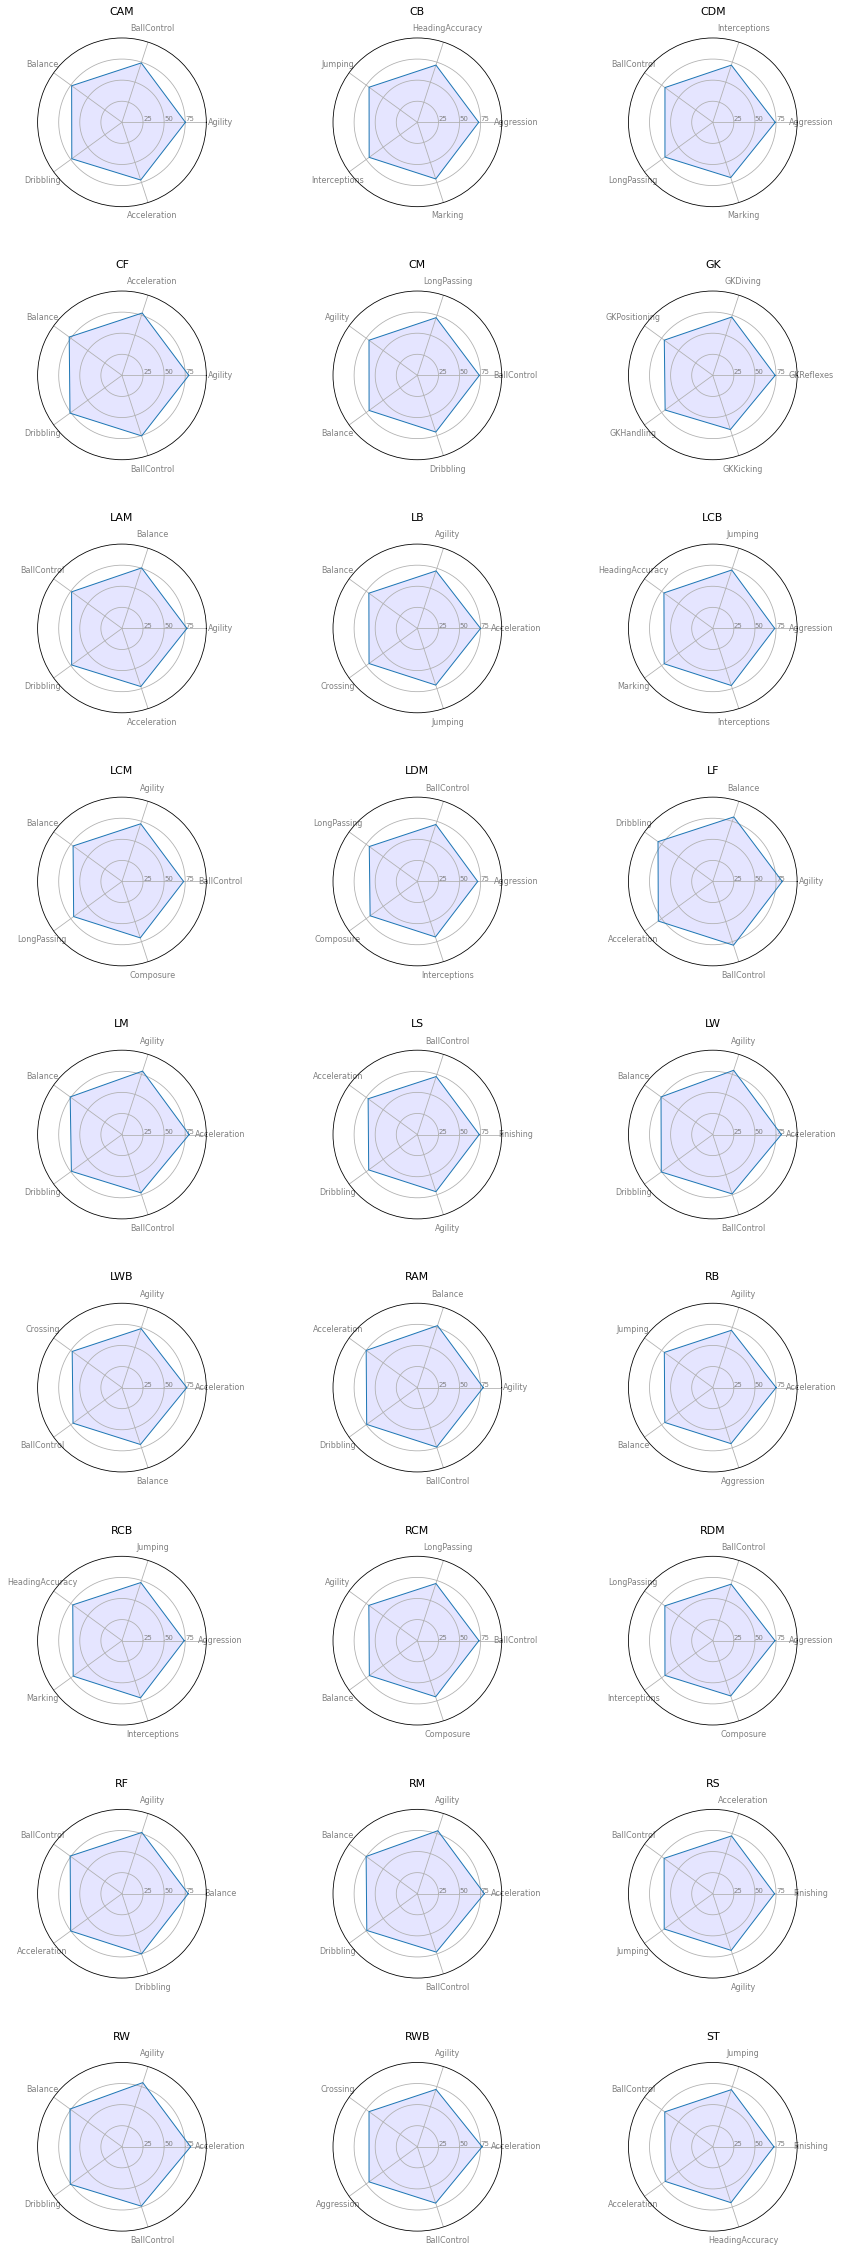

In [27]:
player_features = (
    'Acceleration', 'Aggression', 'Agility', 
    'Balance', 'BallControl', 'Composure', 
    'Crossing', 'Dribbling', 'FKAccuracy', 
    'Finishing', 'GKDiving', 'GKHandling', 
    'GKKicking', 'GKPositioning', 'GKReflexes', 
    'HeadingAccuracy', 'Interceptions', 'Jumping', 
    'LongPassing', 'LongShots', 'Marking', 'Penalties'
)

from math import pi
idx = 1
plt.figure(figsize=(15,45))
for position_name, features in df.groupby(df['Position'])[player_features].mean().iterrows():
    top_features = dict(features.nlargest(5))
    
    # number of variable
    categories=top_features.keys()
    N = len(categories)

    # We are going to plot the first line of the data frame.
    # But we need to repeat the first value to close the circular graph:
    values = list(top_features.values())
    values += values[:1]

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    ax = plt.subplot(10, 3, idx, polar=True)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=8)
 # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([25,50,75], ["25","50","75"], color="grey", size=7)
    plt.ylim(0,100)
    
    plt.subplots_adjust(hspace = 0.5)
    
    # Plot data
    ax.plot(angles, values, linewidth=1, linestyle='solid')

    # Fill area
    ax.fill(angles, values, 'b', alpha=0.1)
    
    plt.title(position_name, size=11, y=1.1)
    
    idx += 1

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


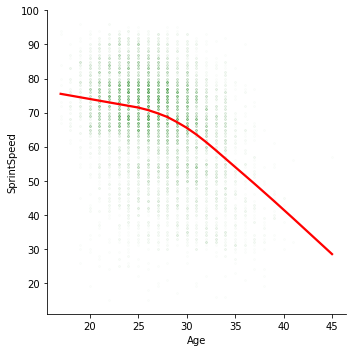

In [28]:
sns.lmplot(data = df, x = 'Age', y = 'SprintSpeed',lowess=True,scatter_kws={'alpha':0.01, 's':5,'color':'green'}, 
           line_kws={'color':'red'})

As the `age` increases the `sprint speed` decreases

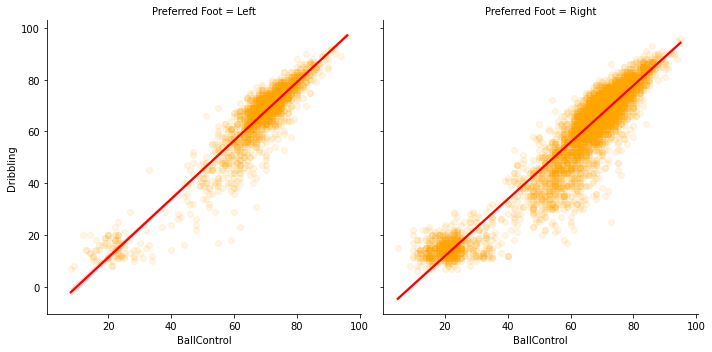

In [29]:
sns.lmplot(x = 'BallControl', y = 'Dribbling', data = df,col = 'Preferred Foot',scatter_kws = {'alpha':0.1,'color':'orange'},
           line_kws={'color':'red'})

`Left Footed Players` vs `Right Footed Players`

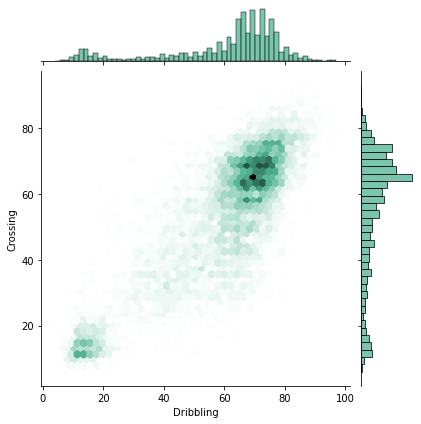

In [30]:

sns.jointplot(x=df['Dribbling'], y=df['Crossing'], kind="hex", color="#4CB391");

`Crossing` vs `Dribbling`

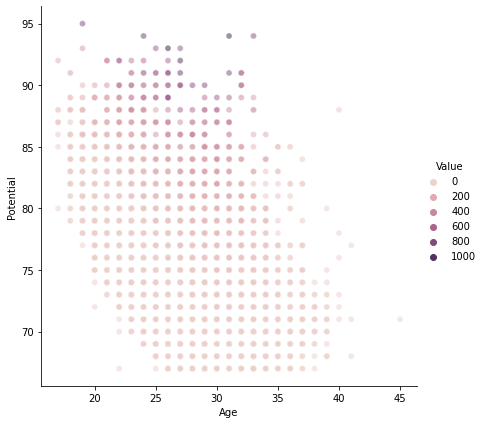

In [31]:
value = df.Value
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)

sns.relplot(x="Age", y="Potential", hue=value/100000, 
            sizes=(40, 400), alpha=.5,
            height=6, data=df);

Relation between `potential` and `age` with respected `value` of players

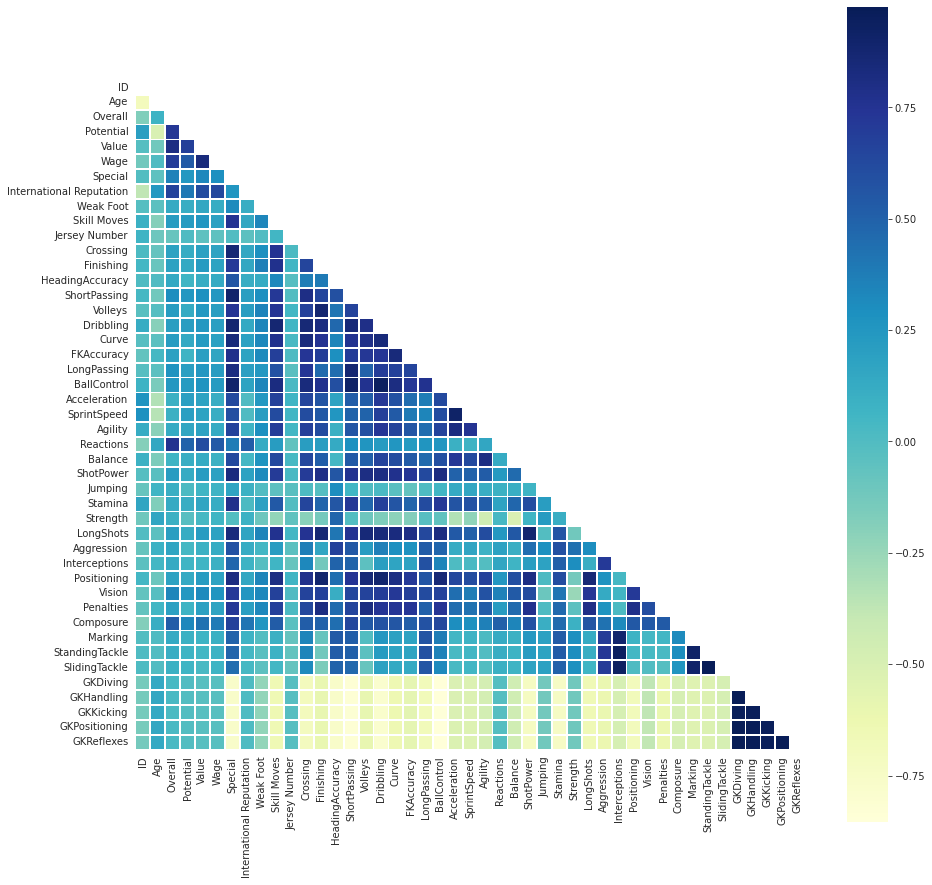

In [32]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(15, 15))
    ax = sns.heatmap(corr,mask=mask,square=True,linewidths=.8,cmap="YlGnBu")

**Lowest correlation** among the goalkeeping side with other columns and high among themselves 

**High correlation** between `Dribbling`, `Volleys`, `Passing` etc...

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


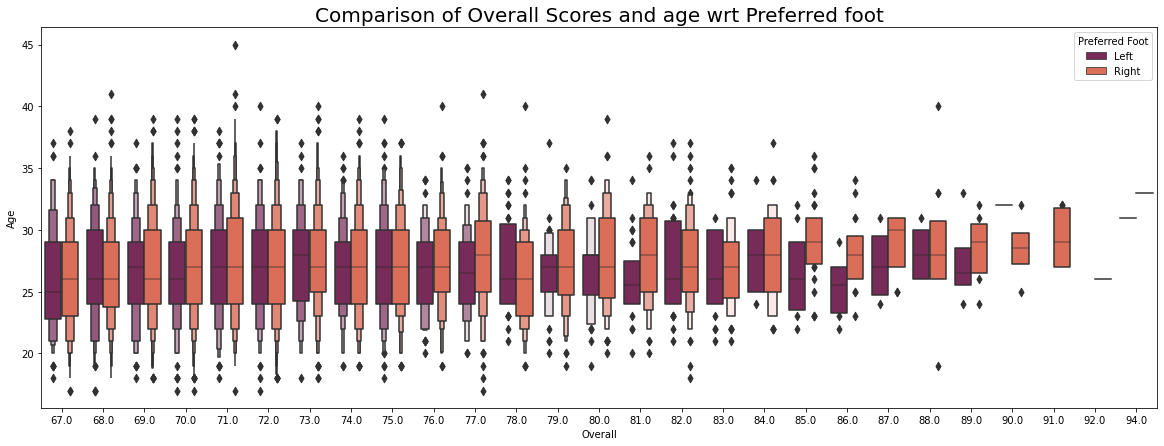

In [33]:
plt.rcParams['figure.figsize'] = (20, 7)
plt.style.use('seaborn-dark-palette')

sns.boxenplot(df['Overall'], df['Age'], hue = df['Preferred Foot'], palette = 'rocket')
plt.title('Comparison of Overall Scores and age wrt Preferred foot', fontsize = 20)
plt.show()

We will have comparisions for `Age`, `Overall`, `Potential`, `Accelaration`, `SprintSpeed`, `Agility` , `Stamina`, `Strength`

In [34]:
cols = ['Age','Overall','Potential','Acceleration','SprintSpeed',"Agility","Stamina",'Strength','Preferred Foot']
df_small = df[cols]

In [35]:
df_small.head()

Age  Overall  Potential  ...  Stamina  Strength  Preferred Foot
0   31     94.0       94.0  ...     72.0      59.0            Left
1   33     94.0       94.0  ...     88.0      79.0           Right
2   26     92.0       93.0  ...     81.0      49.0           Right
3   27     91.0       93.0  ...     43.0      64.0           Right
4   27     91.0       92.0  ...     90.0      75.0           Right

[5 rows x 9 columns]

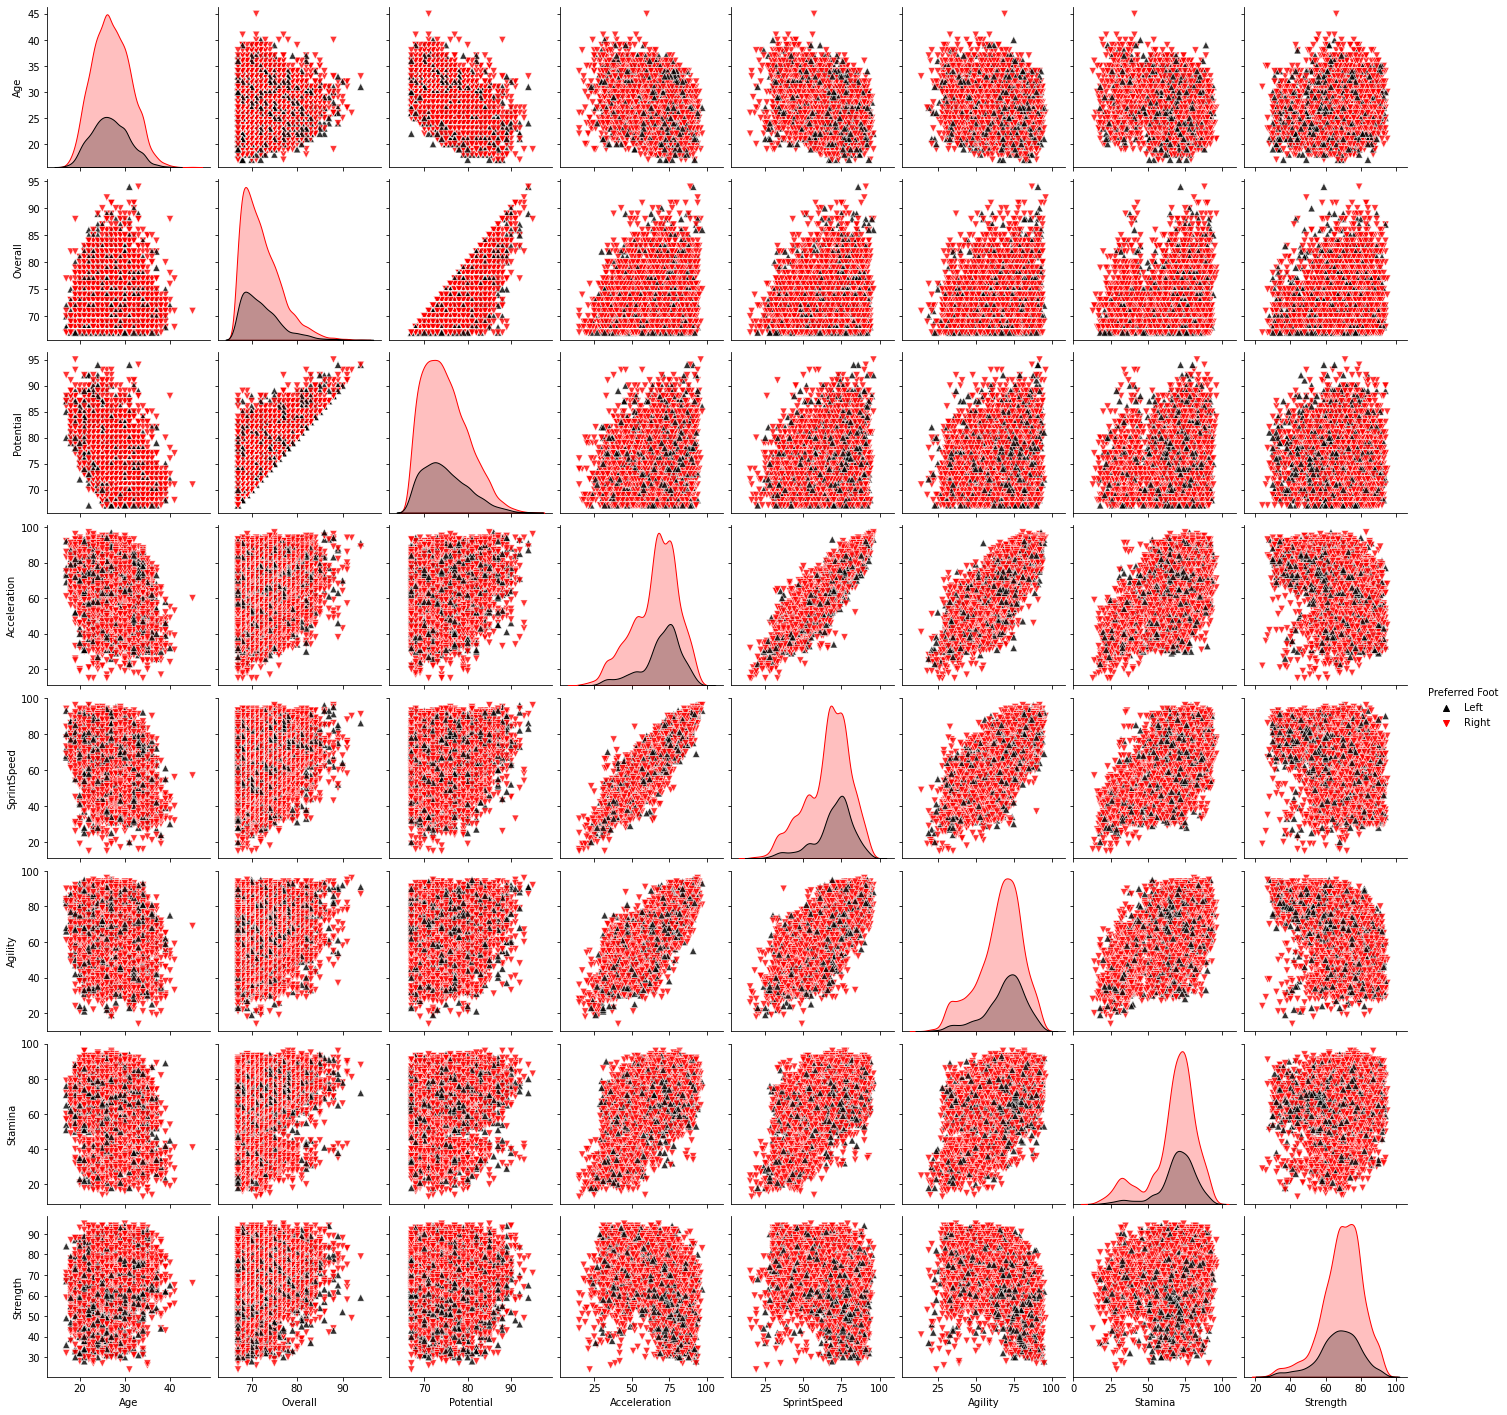

In [36]:
sns.pairplot(df_small, hue ='Preferred Foot',palette=["black", "red"],plot_kws=dict(s=50, alpha =0.8),markers=['^','v'])

### From the plot we can infer many things. 
* Firstly, most of the people are right footed xD
* Some unusual behavior in `Potential` vs `Overall`
* `Accelaration` and `SprintSpeed` follow a proper linear relationship
* `Agility` vs `SprintSpeed`, `Agility` vs `Accelaration` and `Agility` vs `Stamina` have somewhat linear relationship

<a id="5"></a> <br>
# 5.Modelling

In [39]:
df=pd.read_csv('/content/data.csv')

In [40]:
#DROP UNNECESSARY VALUES
drop_cols = df.columns[28:54]
df = df.drop(drop_cols, axis = 1)
df = df.drop(['Unnamed: 0','ID','Photo','Flag','Club Logo','Jersey Number','Joined','Special','Loaned From','Body Type', 'Release Clause',
               'Weight','Height','Contract Valid Until','Wage','Value','Name','Club'], axis = 1)
df = df.dropna()
df.head()

Age Nationality  Overall  ...  GKKicking GKPositioning  GKReflexes
0   31   Argentina       94  ...       15.0          14.0         8.0
1   33    Portugal       94  ...       15.0          14.0        11.0
2   26      Brazil       92  ...       15.0          15.0        11.0
3   27       Spain       91  ...       87.0          88.0        94.0
4   27     Belgium       91  ...        5.0          10.0        13.0

[5 rows x 45 columns]

In [41]:
#Turn Real Face into a binary indicator variable
def face_to_num(df):
    if (df['Real Face'] == 'Yes'):
        return 1
    else:
        return 0
    
#Turn Preferred Foot into a binary indicator variable
def right_footed(df):
    if (df['Preferred Foot'] == 'Right'):
        return 1
    else:
        return 0

#Create a simplified position varaible to account for all player positions
def simple_position(df):
    if (df['Position'] == 'GK'):
        return 'GK'
    elif ((df['Position'] == 'RB') | (df['Position'] == 'LB') | (df['Position'] == 'CB') | (df['Position'] == 'LCB') | (df['Position'] == 'RCB') | (df['Position'] == 'RWB') | (df['Position'] == 'LWB') ):
        return 'DF'
    elif ((df['Position'] == 'LDM') | (df['Position'] == 'CDM') | (df['Position'] == 'RDM')):
        return 'DM'
    elif ((df['Position'] == 'LM') | (df['Position'] == 'LCM') | (df['Position'] == 'CM') | (df['Position'] == 'RCM') | (df['Position'] == 'RM')):
        return 'MF'
    elif ((df['Position'] == 'LAM') | (df['Position'] == 'CAM') | (df['Position'] == 'RAM') | (df['Position'] == 'LW') | (df['Position'] == 'RW')):
        return 'AM'
    elif ((df['Position'] == 'RS') | (df['Position'] == 'ST') | (df['Position'] == 'LS') | (df['Position'] == 'CF') | (df['Position'] == 'LF') | (df['Position'] == 'RF')):
        return 'ST'
    else:
        return df.Position

#Get a count of Nationalities in the Dataset, make of list of those with over 250 Players (our Major Nations)
nat_counts = df.Nationality.value_counts()
nat_list = nat_counts[nat_counts > 250].index.tolist()

#Replace Nationality with a binary indicator variable for 'Major Nation'
def major_nation(df):
    if (df.Nationality in nat_list):
        return 1
    else:
        return 0

#Create a copy of the original dataframe to avoid indexing errors
df1 = df.copy()

#Apply changes to dataset to create new column
df1['Real_Face'] = df1.apply(face_to_num, axis=1)
df1['Right_Foot'] = df1.apply(right_footed, axis=1)
df1['Simple_Position'] = df1.apply(simple_position,axis = 1)
df1['Major_Nation'] = df1.apply(major_nation,axis = 1)

#Split the Work Rate Column in two
tempwork = df1["Work Rate"].str.split("/ ", n = 1, expand = True) 
#Create new column for first work rate
df1["WorkRate1"]= tempwork[0]   
#Create new column for second work rate
df1["WorkRate2"]= tempwork[1]
#Drop original columns used
df1 = df1.drop(['Work Rate','Preferred Foot','Real Face', 'Position','Nationality'], axis = 1)
df1.head()


Age  Overall  Potential  ...  Major_Nation  WorkRate1  WorkRate2
0   31       94         94  ...             1     Medium     Medium
1   33       94         94  ...             1       High        Low
2   26       92         93  ...             1       High     Medium
3   27       91         93  ...             1     Medium     Medium
4   27       91         92  ...             1       High       High

[5 rows x 46 columns]

In [42]:
#Split ID as a Target value
target = df1.Overall
df2 = df1.drop(['Overall'], axis = 1)

#Splitting into test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df2, target, test_size=0.2)

#One Hot Encoding
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)
print(X_test.shape,X_train.shape)
print(y_test.shape,y_train.shape)

(3630, 54) (14517, 54)
(3630,) (14517,)


In [43]:
#Applying Linear Regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

#Finding the r2 score and root mean squared error
from sklearn.metrics import r2_score, mean_squared_error
print('r2 score: '+str(r2_score(y_test, predictions)))
print('RMSE : '+str(np.sqrt(mean_squared_error(y_test, predictions))))

r2 score: 0.9300477332067211
RMSE : 1.862006270646722


Permutation importance is the first tool for understanding a machine-learning model, and involves shuffling individual variables in the validation data (after a model has been fit), and seeing the effect on accuracy.

In [45]:
perm = PermutationImportance(model, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())
#Top 3 important features are Potential, Age & Reactions 

NameError: ignored

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


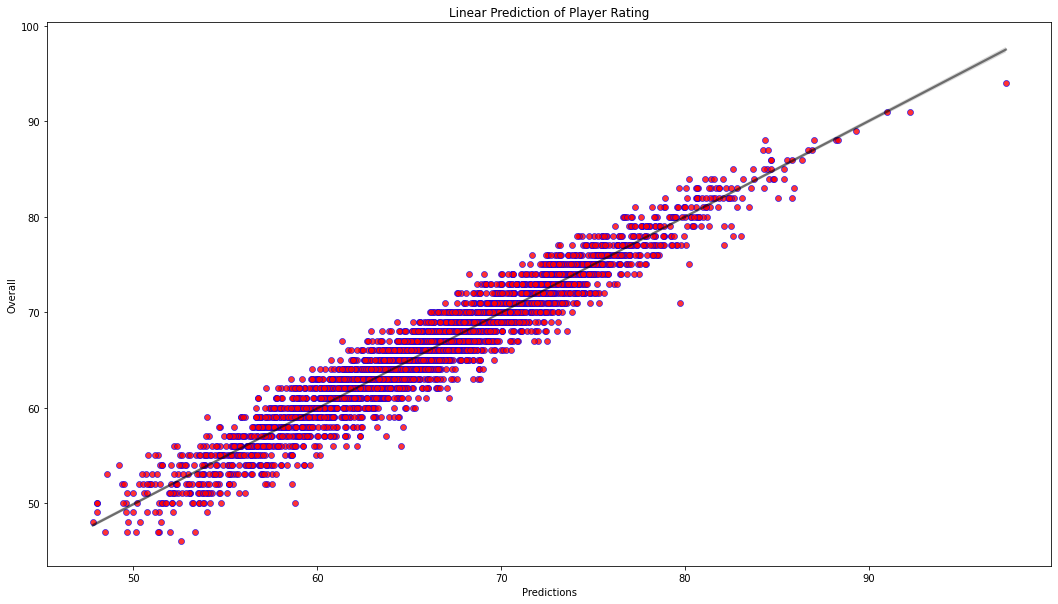

In [44]:
#Visualising the results
plt.figure(figsize=(18,10))
sns.regplot(predictions,y_test,scatter_kws={'color':'red','edgecolor':'blue','linewidth':'0.7'},line_kws={'color':'black','alpha':0.5})
plt.xlabel('Predictions')
plt.ylabel('Overall')
plt.title("Linear Prediction of Player Rating")
plt.show()